# EXPLORATORY DATA ANALISIS¶

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')


from collections import Counter

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, numpy as np, matplotlib.dates as mdates 



import missingno as msgo


#import geopandas as gpd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [125]:
# Path to data
#data_path = '/kaggle/input/covid-vaccination-vs-death/covid-vaccination-vs-death_ratio.csv'

In [126]:
#read the data
covid_df = pd.read_csv('covid_vaccination_vs_death_ratio.csv')

In [127]:
# Check result 
covid_df.head()

Unnamed: 0      country iso_code       date  total_vaccinations  \
0           0  Afghanistan      AFG  5/11/2021              504502   
1           1  Afghanistan      AFG  5/20/2021              547901   
2           2  Afghanistan      AFG  5/24/2021              573277   
3           3  Afghanistan      AFG  5/26/2021              590454   
4           4  Afghanistan      AFG  5/27/2021              593313   

   people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0             448878                    55624          12    40094444   
1             470341                    77560          10    40094444   
2             476367                    96910          10    40094444   
3             479372                   111082          19    40094444   
4             479574                   113739          14    40094444   

      ratio  
0  1.119552  
1  1.173083  
2  1.188112  
3  1.195607  
4  1.196111

# EDA


In [128]:
covid_df.shape

(20332, 10)

In [129]:
#to determine type of dataset
type(covid_df)

pandas.core.frame.DataFrame

In [203]:
# get the number of missing data points per column
missing_values_count = covid_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

country                    0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64

In [130]:
#delete unnamed column
covid_df.drop('Unnamed: 0', axis=1, inplace=True)

covid_df.columns
for col in covid_df.columns:
    if col.startswith('Unnamed'):
        del df[col]

covid_df.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  5/11/2021              504502             448878   
1  Afghanistan      AFG  5/20/2021              547901             470341   
2  Afghanistan      AFG  5/24/2021              573277             476367   
3  Afghanistan      AFG  5/26/2021              590454             479372   
4  Afghanistan      AFG  5/27/2021              593313             479574   

   people_fully_vaccinated  New_deaths  population     ratio  
0                    55624          12    40094444  1.119552  
1                    77560          10    40094444  1.173083  
2                    96910          10    40094444  1.188112  
3                   111082          19    40094444  1.195607  
4                   113739          14    40094444  1.196111

In [131]:
covid_df.shape

(20332, 9)

In [199]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country                  20332 non-null  object        
 1   iso_code                 20332 non-null  object        
 2   date                     20332 non-null  datetime64[ns]
 3   total_vaccinations       20332 non-null  int64         
 4   people_vaccinated        20332 non-null  int64         
 5   people_fully_vaccinated  20332 non-null  int64         
 6   New_deaths               20332 non-null  int64         
 7   population               20332 non-null  int64         
 8   ratio                    20332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 1.4+ MB


In [201]:
covid_df.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        2.033200e+04       2.033200e+04             2.033200e+04   
mean         1.798981e+07       1.155247e+07             6.571098e+06   
std          6.328884e+07       4.242151e+07             2.284904e+07   
min          1.630000e+02       1.620000e+02             1.000000e+00   
25%          4.106325e+05       2.971550e+05             9.506200e+04   
50%          2.363600e+06       1.548864e+06             7.438710e+05   
75%          1.059296e+07       6.060886e+06             4.137016e+06   
max          2.174043e+09       1.100842e+09             1.022207e+09   

         New_deaths    population         ratio  
count  20332.000000  2.033200e+04  20332.000000  
mean     108.781871  4.863896e+07     29.920624  
std      353.037676  1.559664e+08     24.936193  
min      -41.000000  1.619000e+03      0.003023  
25%        1.000000  2.871380e+06      7.197272  
50%       10.000000  1.015944e+07     24.266101  
75%       58.000000  3.816076e+07     50.225309  
max     8786.000000  1.445585e+09    118.567868

# Information about countaries

In [139]:
#number of countries
covid_df['country'].unique().shape

(198,)

# Total population

In [140]:
#total population in this dataset
total_population = covid_df['population'].unique().sum()
total_population

7677597359

# Ratio of fully vaccinated pepole

In [142]:
#sum of fully vaccinated pepole in all countries 
df_country = covid_df.groupby('country').agg({'people_fully_vaccinated':max})
sum_vac_full = df_country['people_fully_vaccinated'].sum()
sum_vac_full

2697145802

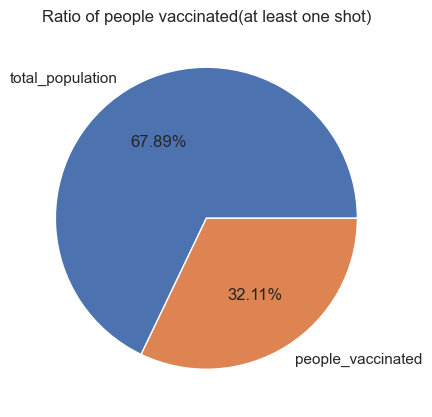

In [205]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac],
    autopct='%.2F%%',
    labels=['total_population','people_vaccinated'])
plt.title('Ratio of people vaccinated(at least one shot)')
plt.show()

In [149]:
#number of people who got at least one shot of COVID vaccine
df_country_vac = covid_df.groupby('country').agg({'people_vaccinated':max}).reset_index()
sum_vac = df_country_vac['people_vaccinated'].sum()
df_country_rat = covid_df.groupby('country').agg({'ratio':max}).reset_index()
df_country_deaths = covid_df.groupby('country').agg({'New_deaths':max}).reset_index()
# df_country_deaths
df_country_rat

country      ratio
0                                          Afghanistan   1.921817
1                                              Albania  33.456108
2                                              Algeria  13.421745
3                                              Andorra  70.211363
4                                               Angola   6.213678
..                                                 ...        ...
193                                  Wallis and Futuna  51.189832
194                                              Yemen   1.004031
195                                             Zambia   1.630822
196                                           Zimbabwe  20.858567
197  occupied Palestinian territory, including east...   6.836014

[198 rows x 2 columns]

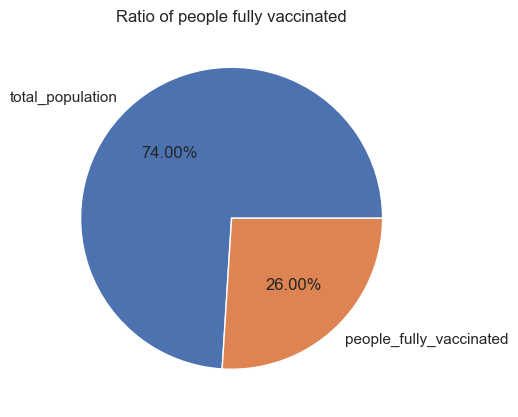

In [204]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac_full],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

# Grouping Data Times Series¶


In [159]:
# Convert date to Datetime type 
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Check result
covid_df['date'].head()

0   2021-05-11
1   2021-05-20
2   2021-05-24
3   2021-05-26
4   2021-05-27
Name: date, dtype: datetime64[ns]

In [161]:
date_group = covid_df.groupby('date').agg('sum').reset_index()

date_group

date  total_vaccinations  people_vaccinated  \
0   2020-12-27               30541              30525   
1   2020-12-28               53046              52909   
2   2020-12-29              107016             106192   
3   2020-12-30              173607             172736   
4   2020-12-31              225737             224777   
..         ...                 ...                ...   
282 2021-10-05          3561082002         2155772795   
283 2021-10-06          3550319066         2147101559   
284 2021-10-07          3614624968         2184253168   
285 2021-10-08          3073473570         1876619087   
286 2021-10-09          2517224184         1559366171   

     people_fully_vaccinated  New_deaths  population        ratio  
0                         16         389    86015327     0.326443  
1                         83         467    94748627     0.458105  
2                        750        1046   106393479     0.603110  
3                        795        1328   106393479     0.722347  
4                        884        1161   106393479     0.873954  
..                       ...         ...         ...          ...  
282               1399645109        6174  4474918021  4947.450160  
283               1397400549        5390  4343206585  4612.485726  
284               1426519822        7748  4740484008  4560.839490  
285               1197702514        6610  3617767739  3624.668259  
286                947815153        2116  3091618891  2136.305477  

[287 rows x 7 columns]

In [206]:
df_corr = covid_df.corr()
df_corr

total_vaccinations  people_vaccinated  \
total_vaccinations                 1.000000           0.985602   
people_vaccinated                  0.985602           1.000000   
people_fully_vaccinated            0.948243           0.881845   
New_deaths                         0.305047           0.319465   
population                         0.686229           0.744189   
ratio                              0.170965           0.139677   

                         people_fully_vaccinated  New_deaths  population  \
total_vaccinations                      0.948243    0.305047    0.686229   
people_vaccinated                       0.881845    0.319465    0.744189   
people_fully_vaccinated                 1.000000    0.259981    0.524252   
New_deaths                              0.259981    1.000000    0.501012   
population                              0.524252    0.501012    1.000000   
ratio                                   0.217102   -0.113327   -0.077156   

                            ratio  
total_vaccinations       0.170965  
people_vaccinated        0.139677  
people_fully_vaccinated  0.217102  
New_deaths              -0.113327  
population              -0.077156  
ratio                    1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

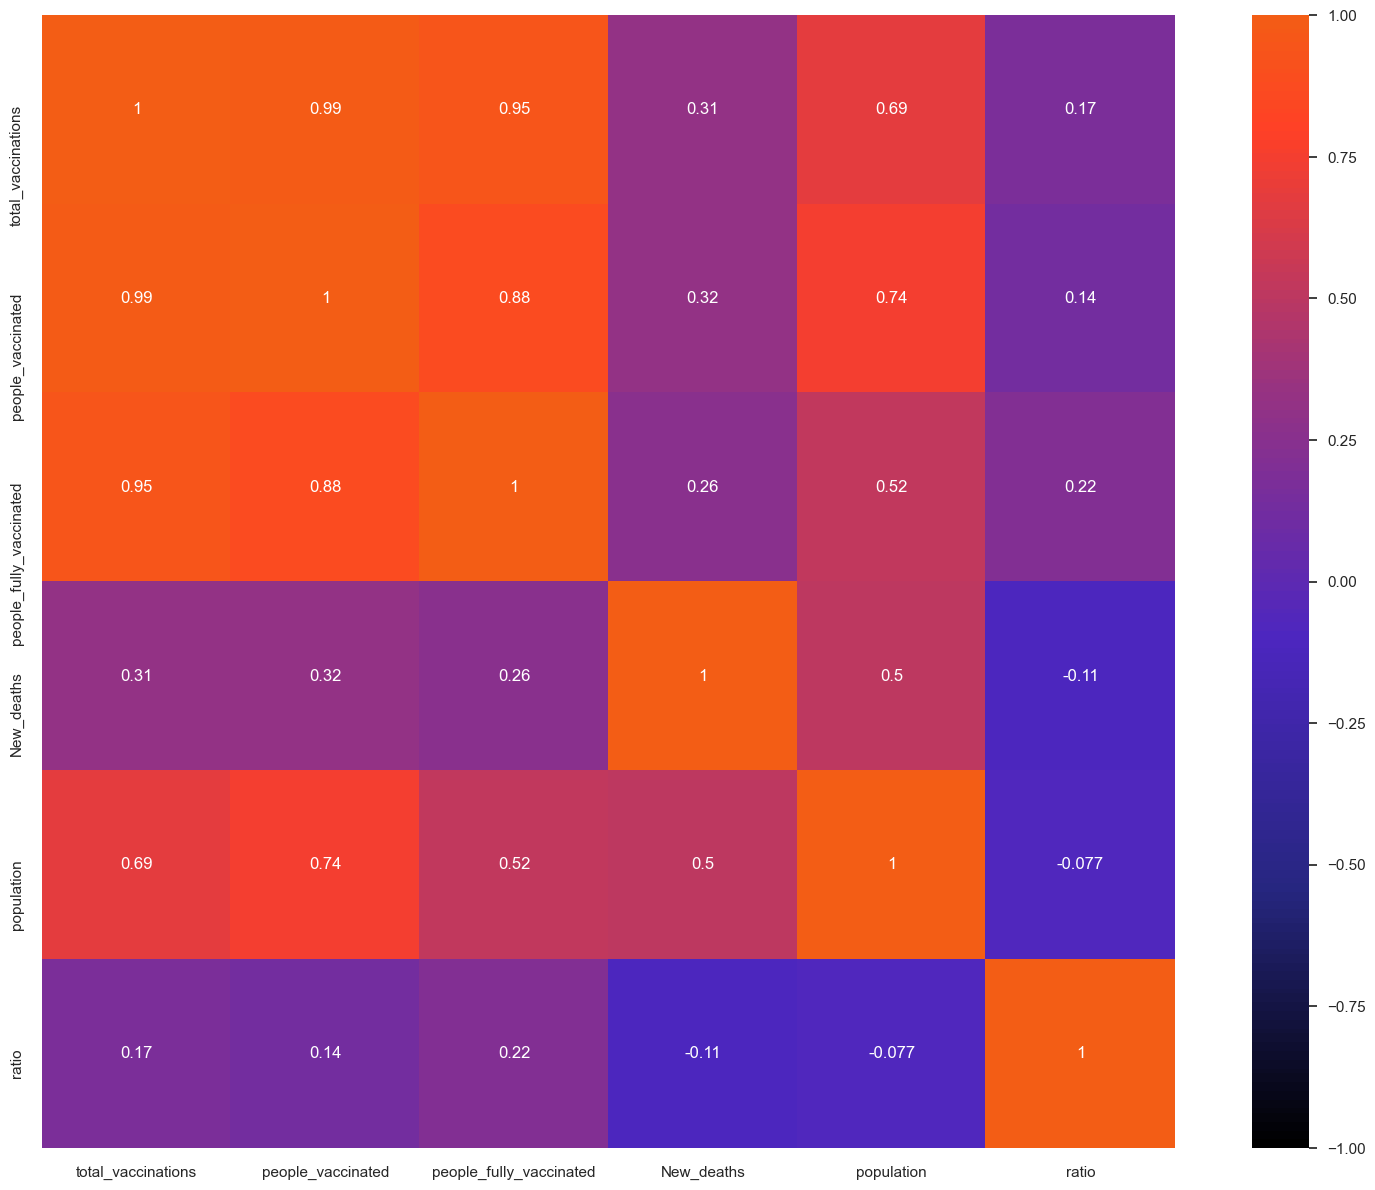

In [207]:
plt.figure(figsize=(20,15),dpi=100)
sns.heatmap(df_corr,annot=True,square=True,vmin=-1,cmap='CMRmap',center=0.8)
plt.yticks(rotation=90)

# Daily World Deaths

In [198]:
date_group
time = date_group['date'].values.tolist()

px.line(x=time,y=date_group['New_deaths'].cumsum())
# In this case New Deaths is a cumulative number so we use function cumsum())


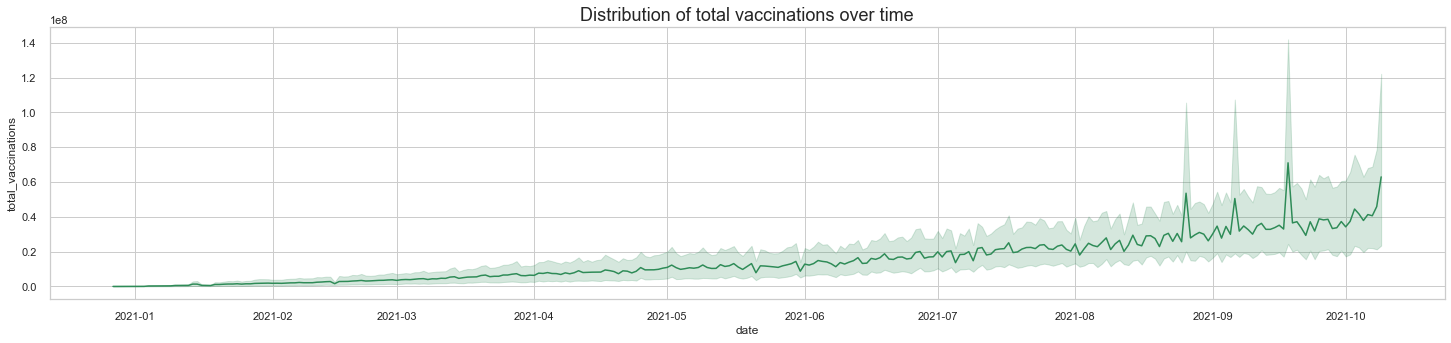

In [197]:
#Distribution over time
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=covid_df, x="date", y="total_vaccinations", color="seagreen")


plt.title("Distribution of total vaccinations over time", fontsize=18);

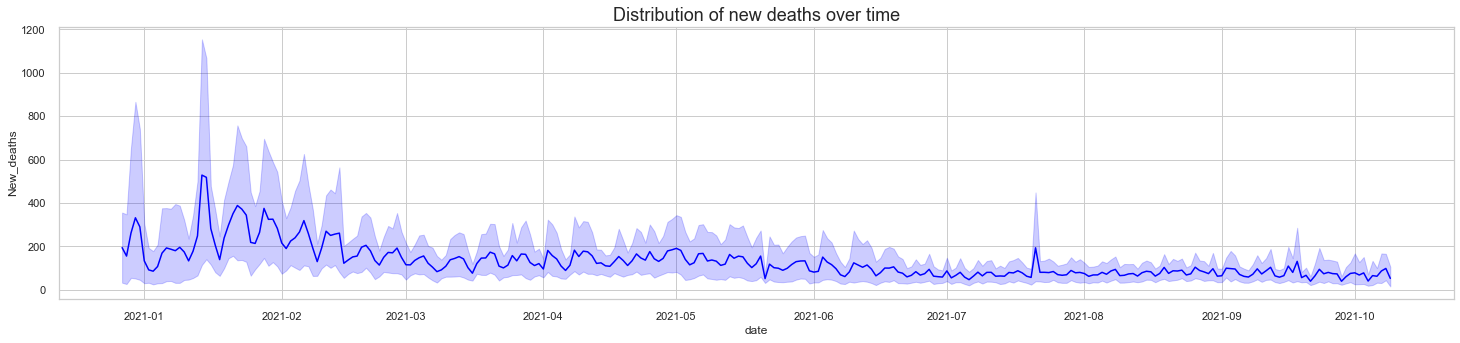

In [196]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=covid_df, x="date", y="New_deaths", color="blue")
plt.title("Distribution of new deaths over time", fontsize=18);

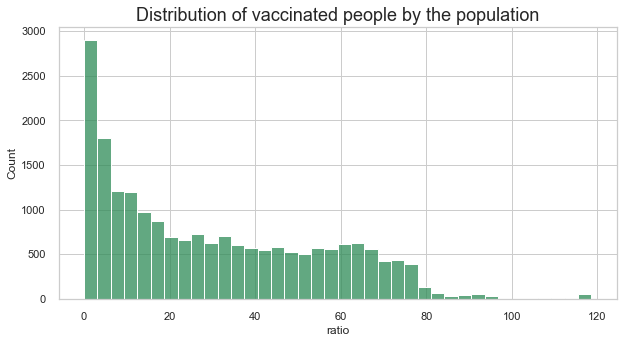

In [173]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=covid_df, x="ratio", color="seagreen")
plt.title("Distribution of vaccinated people by the population", fontsize=18);

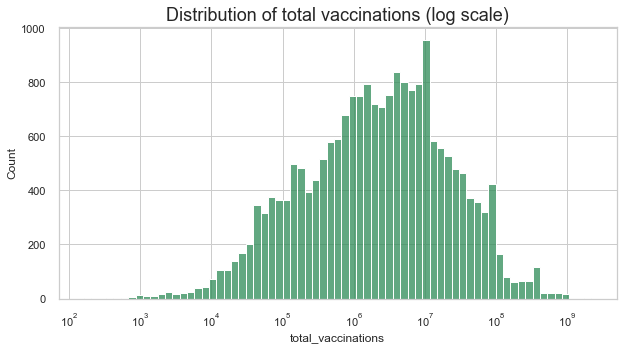

In [164]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=covid_df, x="total_vaccinations", color="seagreen", log_scale=True)
plt.title("Distribution of total vaccinations (log scale)", fontsize=18);

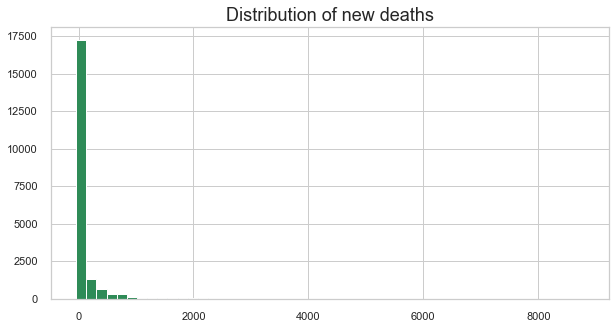

In [26]:
plt.hist(covid_df.New_deaths.dropna().values, bins=50, color="seagreen")
plt.title("Distribution of new deaths", fontsize=18)
plt.show()

In [30]:
# Convert date to Datetime type 
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Check result
covid_df['date']#.head()

0       2021-05-11
1       2021-05-20
2       2021-05-24
3       2021-05-26
4       2021-05-27
           ...    
20327   2021-10-04
20328   2021-10-05
20329   2021-10-06
20330   2021-10-07
20331   2021-10-09
Name: date, Length: 20332, dtype: datetime64[ns]

In [32]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country                  20332 non-null  object        
 1   iso_code                 20332 non-null  object        
 2   date                     20332 non-null  datetime64[ns]
 3   total_vaccinations       20332 non-null  int64         
 4   people_vaccinated        20332 non-null  int64         
 5   people_fully_vaccinated  20332 non-null  int64         
 6   New_deaths               20332 non-null  int64         
 7   population               20332 non-null  int64         
 8   ratio                    20332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 1.4+ MB


In [37]:
covid_df.describe().T

count          mean           std          min  \
total_vaccinations       20332.0  1.798981e+07  6.328884e+07   163.000000   
people_vaccinated        20332.0  1.155247e+07  4.242151e+07   162.000000   
people_fully_vaccinated  20332.0  6.571098e+06  2.284904e+07     1.000000   
New_deaths               20332.0  1.087819e+02  3.530377e+02   -41.000000   
population               20332.0  4.863896e+07  1.559664e+08  1619.000000   
ratio                    20332.0  2.992062e+01  2.493619e+01     0.003023   

                                  25%           50%           75%  \
total_vaccinations       4.106325e+05  2.363600e+06  1.059296e+07   
people_vaccinated        2.971550e+05  1.548864e+06  6.060886e+06   
people_fully_vaccinated  9.506200e+04  7.438710e+05  4.137016e+06   
New_deaths               1.000000e+00  1.000000e+01  5.800000e+01   
population               2.871380e+06  1.015944e+07  3.816076e+07   
ratio                    7.197272e+00  2.426610e+01  5.022531e+01   

                                  max  
total_vaccinations       2.174043e+09  
people_vaccinated        1.100842e+09  
people_fully_vaccinated  1.022207e+09  
New_deaths               8.786000e+03  
population               1.445585e+09  
ratio                    1.185679e+02

In [50]:
# Descriptive statistics
covid_df['country'].describe()

count        20332
unique         198
top       Slovenia
freq           287
Name: country, dtype: object

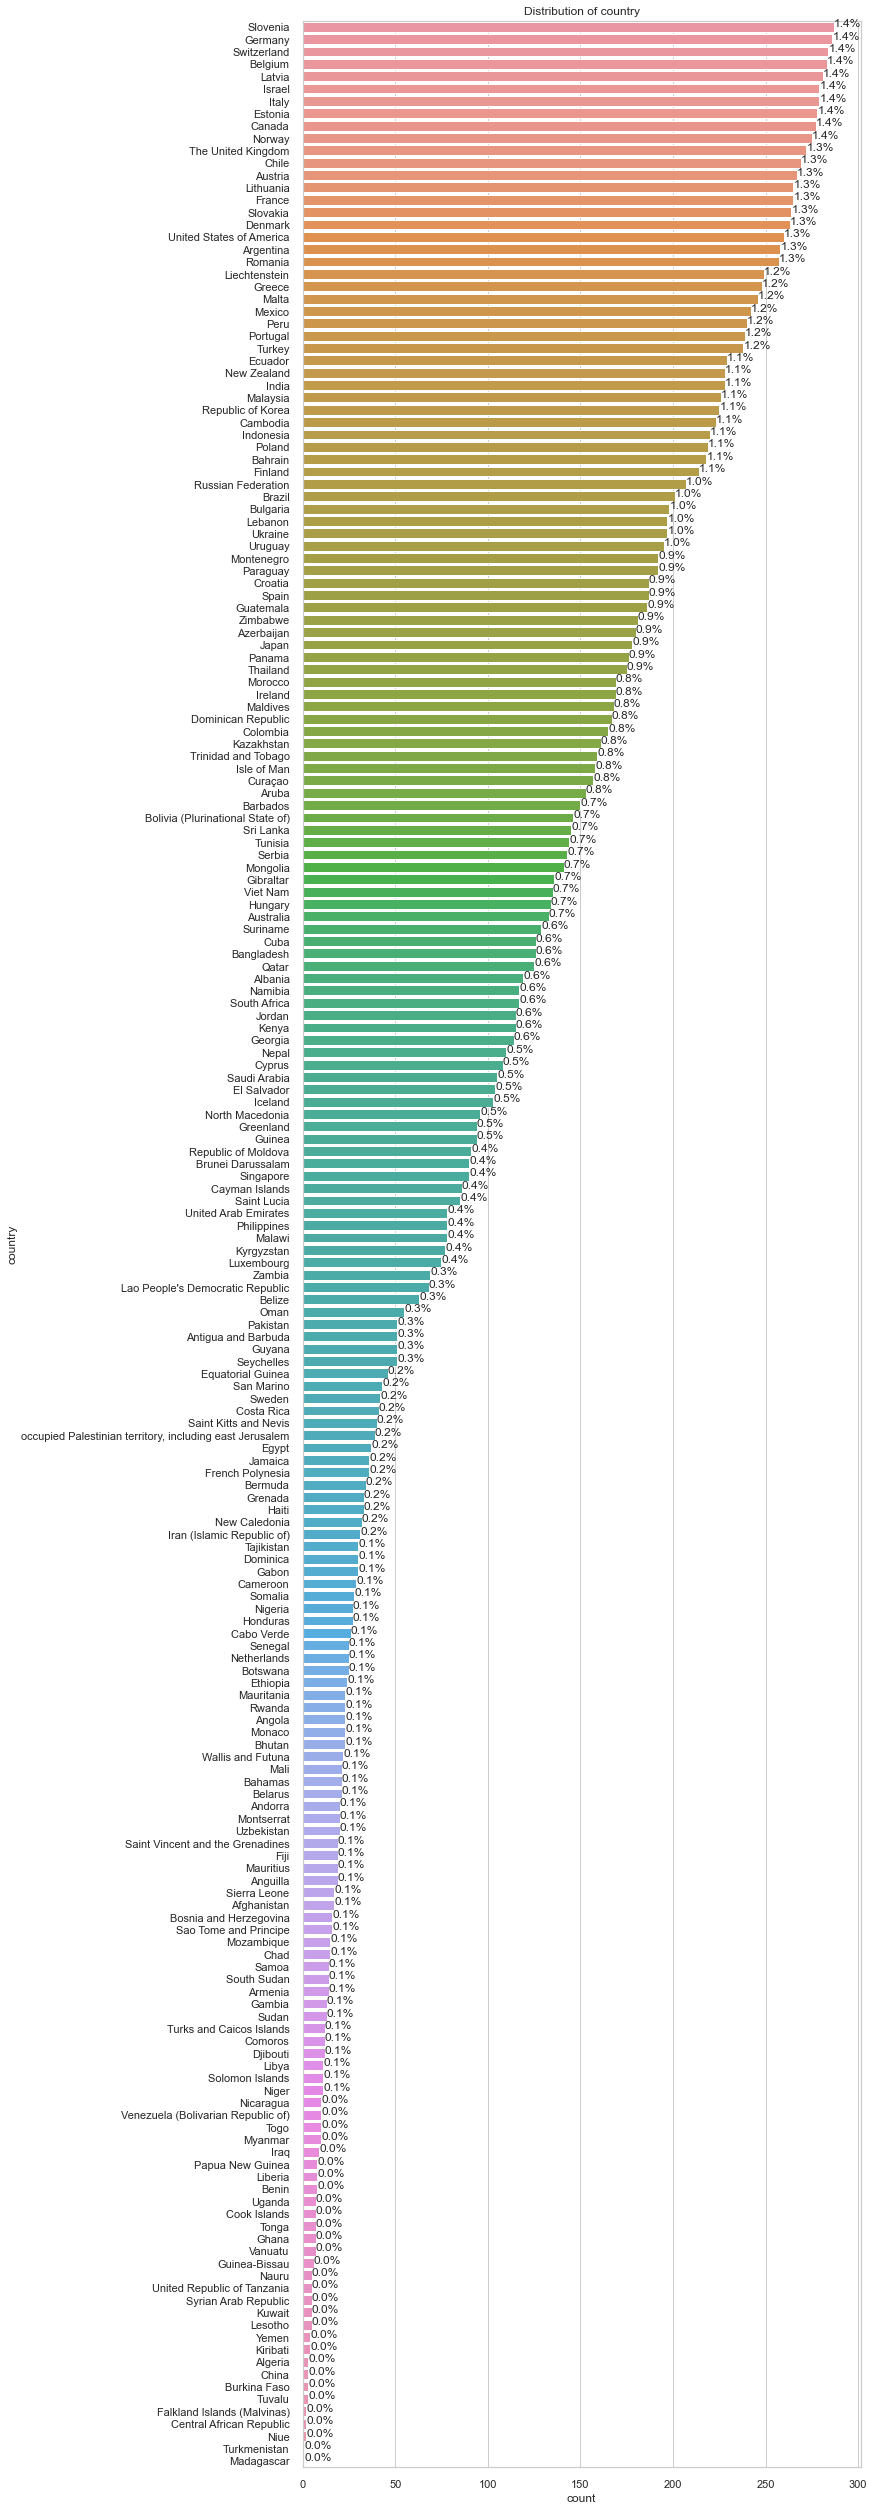

In [54]:
f, ax = plt.subplots(figsize=(10,45))
sns.countplot(y=covid_df.country, order = covid_df.country.value_counts().index);
ax.set_title('Distribution of country');
ax.set(ylabel='country')

total = len(covid_df['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()